In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_classif
import time

### Loading dataset sample

In [2]:
data = pd.read_csv("../dataset/dataset_2.csv", sep = ";").drop("Unnamed: 0", 1)
train = pd.read_csv("../dataset/train_2.csv", sep = ";").drop("Unnamed: 0", 1)
test = pd.read_csv("../dataset/test_2.csv", sep = ";").drop("Unnamed: 0", 1)
data.describe()

,NU_IDADE,SG_UF_RESIDENCIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_LINGUA,Q001,...,Q020,Q021,Q022,Q023,Q024,Q025,NIVEL_MT,Renda_per_capta,Regiao,Pessoas_por_quarto
count,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,...,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06,3.168898e+06
mean,5.970937e+00,1.393897e+01,4.108614e-01,1.068572e+00,2.139669e+00,3.876546e-01,2.869310e+00,4.491498e-01,5.271628e-01,3.439471e+00,...,3.024562e-01,2.136560e-01,2.399529e+00,2.399118e-01,6.882020e-01,7.773933e-01,2.500374e-01,-4.522173e-13,2.046750e+00,3.691336e-12
std,7.183425e+00,7.536545e+00,4.919902e-01,4.164400e-01,1.012008e+00,4.911290e-01,3.971679e+00,6.148688e-01,4.992617e-01,1.873869e+00,...,4.593218e-01,4.098868e-01,1.070197e+00,4.270295e-01,7.721223e-01,4.159964e-01,4.330344e-01,1.000000e+00,1.192872e+00,1.000000e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.665440e-01,0.000000e+00,-1.880658e+00
25%,2.000000e+00,8.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.274470e-01,1.000000e+00,-5.410255e-01
50%,3.000000e+00,1.400000e+01,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,...,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.680491e-01,2.000000e+00,-2.061174e-01
75%,7.000000e+00,2.000000e+01,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,...,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.385733e-03,3.000000e+00,1.287908e-01
max,7.300000e+01,2.600000e+01,1.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,7.000000e+00,...,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.329107e+01,4.000000e+00,1.821383e+01


## Feature selection

### Correlation Matrix

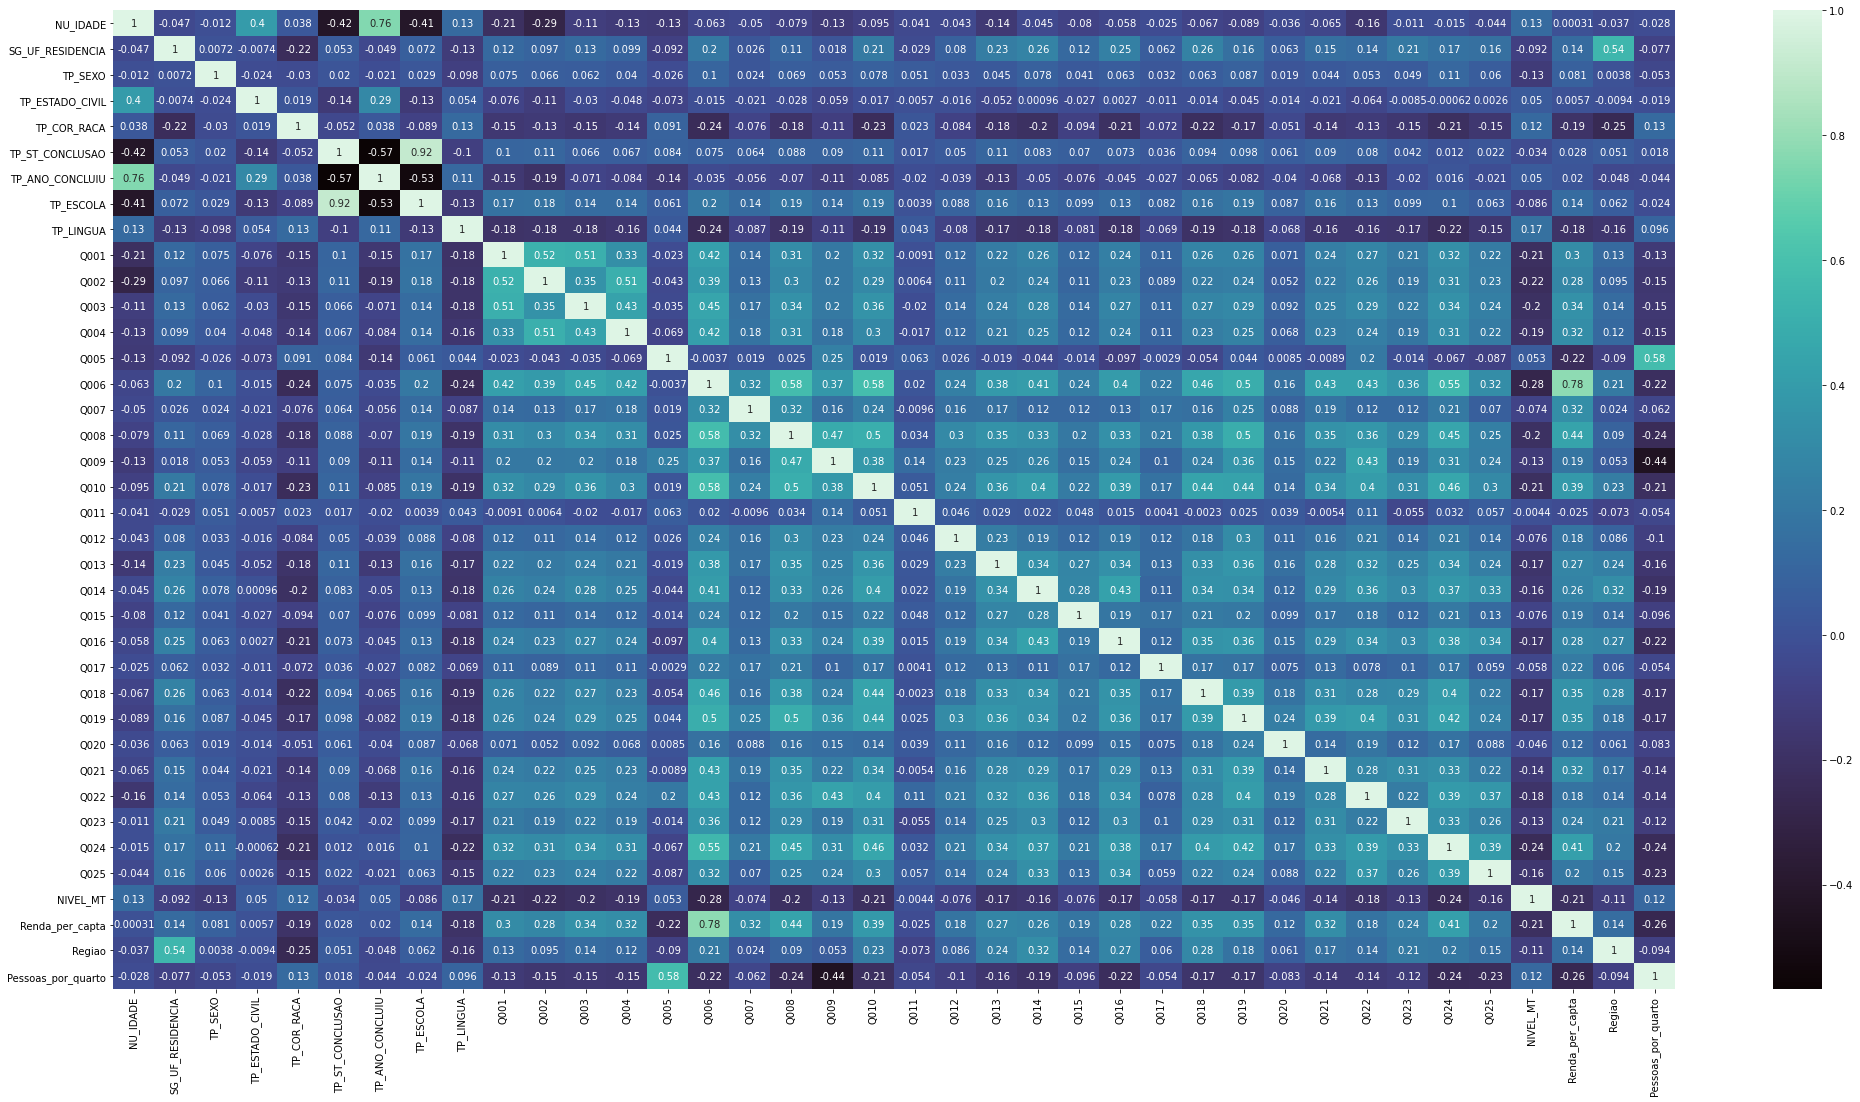

In [3]:
plt.figure(figsize=(35, 18))
sns.heatmap(train.corr(),annot=True,cmap="mako")
plt.savefig("../pictures/Matematica/Matriz_correlação.png")

### Removing correlated features

In [4]:
data = data.drop("TP_ST_CONCLUSAO", 1)
train = train.drop("TP_ST_CONCLUSAO", 1)
test = test.drop("TP_ST_CONCLUSAO", 1)

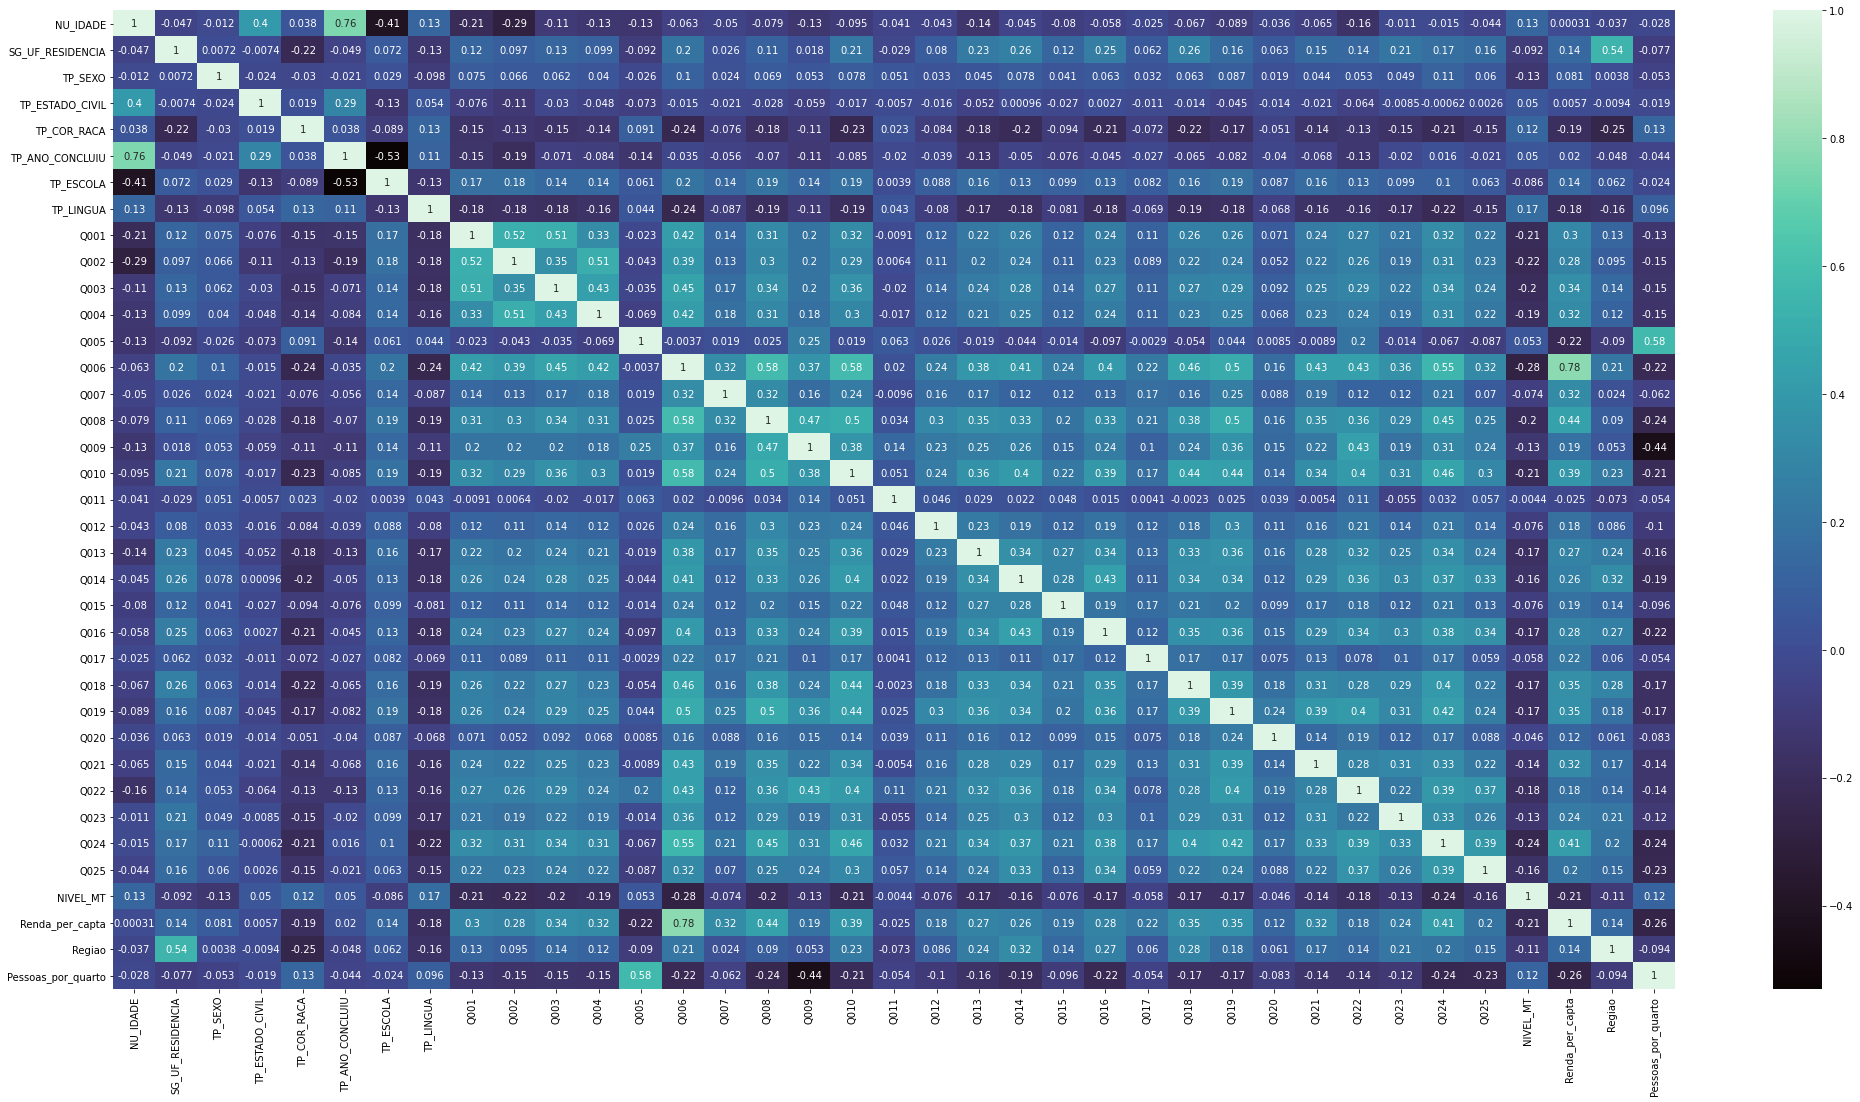

In [5]:
plt.figure(figsize=(35, 18))
sns.heatmap(train.corr(),annot=True,cmap="mako" )
plt.savefig("../pictures/Matematica/Matriz_correlação_apos_remocao.png")

### Removing sensitive features

In [6]:
data = data.drop(["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL","TP_COR_RACA", "Regiao"], 1)
train = train.drop(["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL","TP_COR_RACA", "Regiao"], 1)
test = test.drop(["NU_IDADE", "SG_UF_RESIDENCIA", "TP_SEXO", "TP_ESTADO_CIVIL","TP_COR_RACA", "Regiao"], 1)

### Gini index

Running time: 110.08249235153198


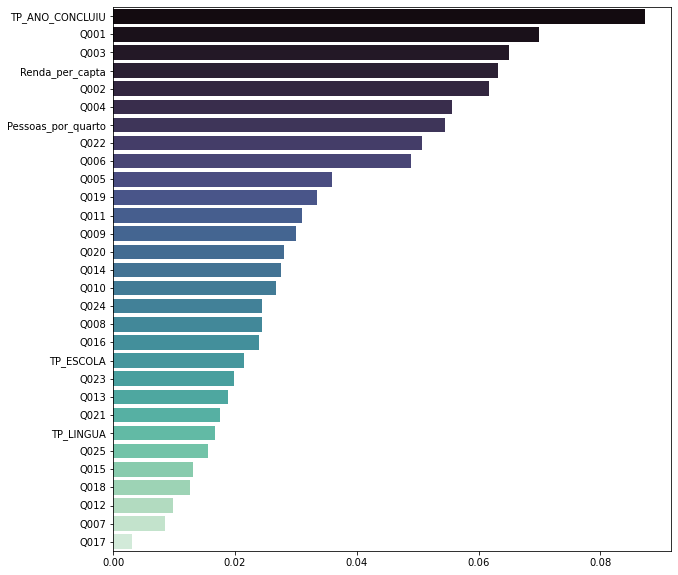

In [7]:
start = time.time()
model = RandomForestClassifier(n_jobs = -1).fit(train.drop("NIVEL_MT", 1), train["NIVEL_MT"])
gini_importance = pd.Series(model.feature_importances_, index = train.drop("NIVEL_MT", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = gini_importance, y = gini_importance.index, palette = "mako")
plt.savefig("../pictures/Matematica/Gini.png")
end = time.time()
print("Running time: " + str(end-start))

In [8]:
data = data.drop(["Q007", "Q017", "Q012", "Q018", "Q015"], 1)
train = train.drop(["Q007", "Q017", "Q012", "Q018", "Q015"], 1)
test = test.drop(["Q007", "Q017", "Q012", "Q018", "Q015"], 1)

### Mutual Information method

Running time: 244.41944694519043


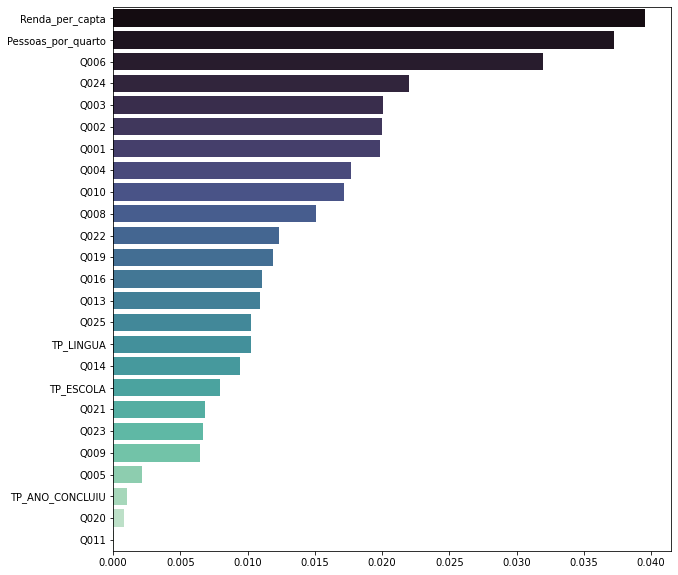

In [9]:
start = time.time()
mi = mutual_info_classif(data.drop("NIVEL_MT", 1), data["NIVEL_MT"], 
                         discrete_features = [col not in ["Renda_per_capta", "Pessoas_por_quarto"] for col in data.drop("NIVEL_MT", 1).columns])
mi_importance = pd.Series(mi, index = data.drop("NIVEL_MT", 1).columns)
mi_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = mi_importance, y = mi_importance.index, palette = "mako")
plt.savefig("../pictures/Matematica/Mutual_Information.png")
end = time.time()
print("Running time: " + str(end-start))

In [10]:
data = data.drop(["Q011", "Q020", "TP_ANO_CONCLUIU", "Q005", "Q009", "Q023", "Q021"], 1)
train = train.drop(["Q011", "Q020", "TP_ANO_CONCLUIU", "Q005", "Q009", "Q023", "Q021"], 1)
test = test.drop(["Q011", "Q020", "TP_ANO_CONCLUIU", "Q005", "Q009", "Q023", "Q021"], 1)

### Saving data

In [11]:
data.to_csv("../dataset/dataset_3.csv", sep = ";")
train.to_csv("../dataset/train_3.csv", sep = ";")
test.to_csv("../dataset/test_3.csv", sep = ";")